In [136]:
# data structure and working with data api's
import numpy as np
import pandas as pd
# graphing/plotting super cool charts api
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# trade api
import alpaca_trade_api as trader
# stock data api
import yfinance as yf
# processing data/getting indicators api
import talib
# timing stuff
import time
# machine learning stuff
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
# scoring machine learning
from sklearn.metrics import r2_score

In [220]:
# getting the ticker itself
ticker = str(input('Enter ticker here:'))

Enter ticker here: spy


In [221]:
# getting ticker's data
df = yf.Ticker(ticker)
df = df.history(period='2y', interval='1d')
close = df['Close']

In [222]:
inputs = pd.DataFrame()

In [225]:
# adding all indicators, for this purpose will be just 20 and 50 ma, 12 and 26 ema, as well as previous price
inputs['SMA20'] = talib.MA(df.Close, timeperiod=20)
inputs['SMA50'] = talib.MA(df.Close, timeperiod=50)
inputs['EMA12'] = talib.EMA(df.Close, timeperiod=12)
inputs['EMA26'] = talib.EMA(df.Close, timeperiod=26)
inputs['TEMA'] = talib.TEMA(df.Close)
inputs['ATR'] = talib.ATR(df.High, df.Low, df.Close, timeperiod=14)
#inputs['']
inputs['PClose'] = close
inputs = inputs.shift(1)

In [226]:
# cleaning up the inputs
inputs = inputs.dropna(axis=0)
predictor = close[inputs.index]

In [227]:
# now we establish the prediction pipeline
Input = [ ('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias = False)), ('model', RidgeCV()) ]
pipe = Pipeline(Input)

In [228]:
pipe.fit(inputs, predictor)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None,
                         fit_intercept=True, gcv_mode=None, normalize=False,
                         scoring=None, store_cv_values=False))],
         verbose=False)

In [229]:
predicted = pipe.predict(inputs)

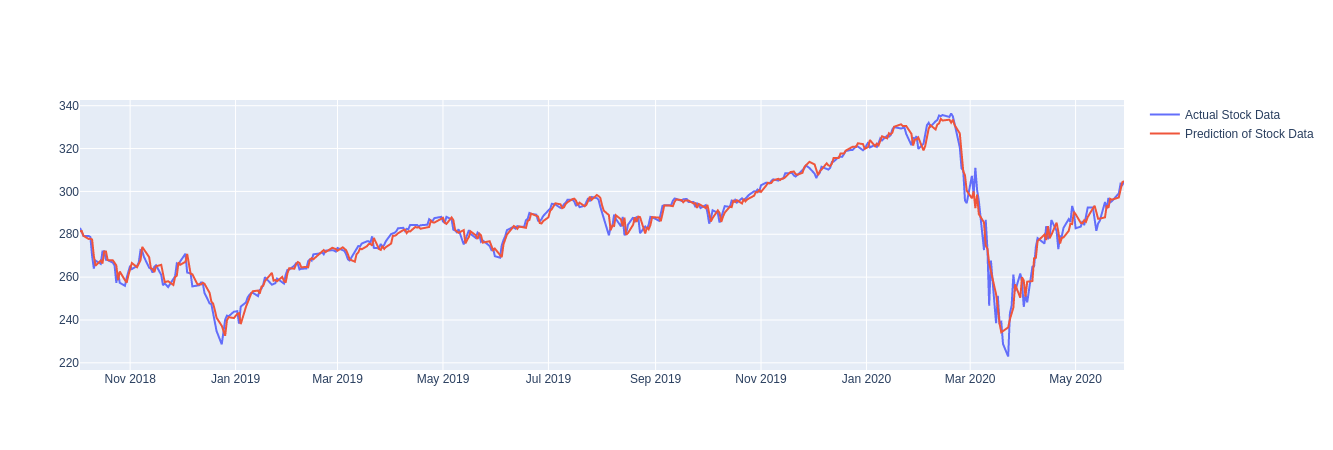

In [230]:
#trace1 = go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='Stock Data')
trace1 = go.Scatter(x=predictor.index, y=predictor, name='Actual Stock Data')
trace2 = go.Scatter(x=inputs.index, y=predicted, name='Prediction of Stock Data')
fig = go.Figure(data=[trace1, trace2])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [231]:
pipe.score(inputs[-50:], predictor[-50:]), pipe.score(inputs, predictor)

(0.9141731814611624, 0.9722244808798257)

In [232]:
pipe.steps[2][1].coef_

array([  4.02223568,   6.00212524,  -5.01579362, -10.83101174,
         6.75350905,  -2.86741296,  21.35975115,   4.44447111,
         4.90678079,   1.2233923 ,   0.64753483, -10.46400238,
        -6.5522135 ,   2.64379435,   5.4317408 ,  -6.60607847,
        -3.71611771, -12.83717295,   1.65866937,   0.49470915,
        12.91744497,   2.01204306,   9.89087657,   1.10065185,
        -9.35302881,  -1.81933422,  -5.66643725,  -8.55201933,
         4.85190482,   7.58642416,  14.24889949, -18.53941273,
        -1.82900293,  -6.29722386,   9.43282423])